In [2]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression

In [13]:
# random distribution of heights 
heights = np.random.uniform(1, 10, 1000)
weights = np.random.uniform(30, 100, 1000)




- **Mean**: 
  $$ \text{mean}(x) = \frac{\Sigma x_i}{\text{count}(x)} $$

- **Variance**: 
  $$ \text{variance}(x) = \Sigma (x_i - \text{mean}(x))^2 $$

- **Covariance**: 
  $$ \text{covariance} = \Sigma (x_i - \text{mean}(x))(y_i - \text{mean}(y)) $$


In [14]:
def mean(x):
    return np.mean(x)

def variance(x):
    return np.var(x)

def covariance(x,y):
    return np.cov(x, y)[0][1]

In [15]:
# demo
print(f"mean: {mean(heights)}, variance: {variance(heights)}, covariance: {covariance(heights, weights)}")

mean: 5.424764102948875, variance: 6.784475627506996, covariance: -1.9064334793893198


## Linear Reg
 $$ w_1 = \frac{\Sigma (x_i - \text{mean}(x))(y_i - \text{mean}(y))}{\Sigma (x_i - \text{mean}(x))^2} $$
  
  $$ w_0 = \text{mean}(y) - b_1 \cdot \text{mean}(x) $$

- equation
$$ y = w_0 + w_1 \cdot x $$

In [19]:
# linear regression
x, y= heights, weights
def linear_regression(x, y):
    b1 = covariance(x, y) / variance(x)
    b0 = mean(y) - b1 * mean(x)
    return b0, b1

b0, b1 = linear_regression(x, y)
print(f"Linear regression: y = {b0} + ({b1:.3f})x")


Linear regression: y = 66.55235905011732 + (-0.281)x


In [22]:
# check the shape
print(heights.shape, weights.shape)


(1000,) (1000,)


In [43]:
# reshape
heights = heights.reshape(-1, 1)
weights = weights.reshape(-1,1)

In [24]:
# initiate and fit the model
model = LinearRegression()
model.fit(heights, weights)
model

LinearRegression()

In [35]:
new_height = np.random.uniform(1,10,1).reshape(-1,1)
predicted_weights = model.predict(new_height)
predicted_weights

array([[64.05318517]])

In [41]:
slope = model.coef_[0][0]
intercept = model.intercept_[0]
print(f"the slope and the intercept are {slope} and\t{intercept}")

the slope and the intercept are -0.2807183856904451 and	66.5508346947402


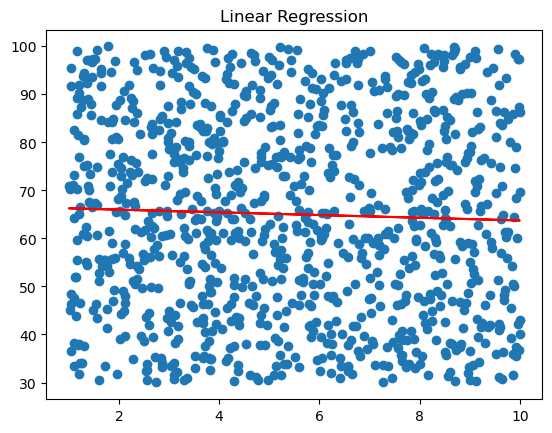

In [45]:
plt.scatter(x, y)
plt.plot(x, b0 + b1 * x, color='red')
plt.title("Linear Regression")
plt.show()

In [47]:
# Probability
# Addition Rule
# independent events
# mutually non-exclusive case
def addition_rule(p_a, p_b, p_a_and_b=0): # if not given, assuming the events are mutually exclusive
    return p_a + p_b - p_a_and_b

print(f"P(A or B) = {addition_rule(3/6, 4/6, 2/6):.2f}")

P(A or B) = 0.83


In [48]:
# Conditional Probability 
# dependent events
def conditional_probability(p_a_and_b, p_b):
    return p_a_and_b / p_b

print(f"P(Red|Blue) = {conditional_probability(3/4, 1):.2f}")

P(Red|Blue) = 0.75


In [50]:
# Multiplication Rule
# simulataneously occuring
def multiplication_rule(p_a, p_b):
    return p_a * p_b

print(f"P(A and B) for independent events = {multiplication_rule(1/2, 1/2):.2f}")

P(A and B) for independent events = 0.25


- If the events are dependent, then 
    $$P(A and B)=P(A)*P(B|A).

In [51]:
# Bayes' Theorem
def bayes_theorem(p_b_given_a, p_a, p_b):
    return (p_b_given_a * p_a) / p_b

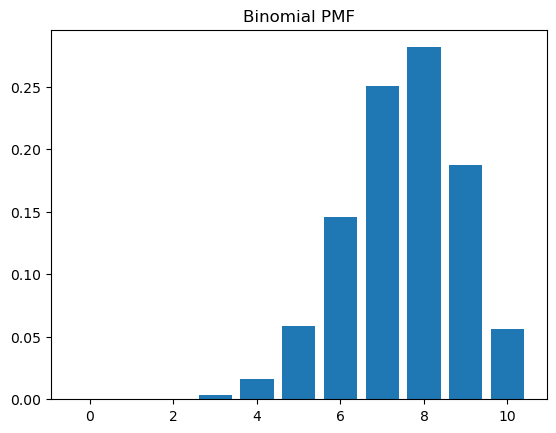

In [58]:
# Probability Mass Function (PMF)
# discrete random variable
n, p = 10, 0.75
x = np.arange(0, n+1)
pmf = stats.binom.pmf(x, n, p)

plt.bar(x, pmf)
plt.title("Binomial PMF")
plt.show()

In [62]:
stats.binom.pmf(3,10,0.5)

0.11718750000000004

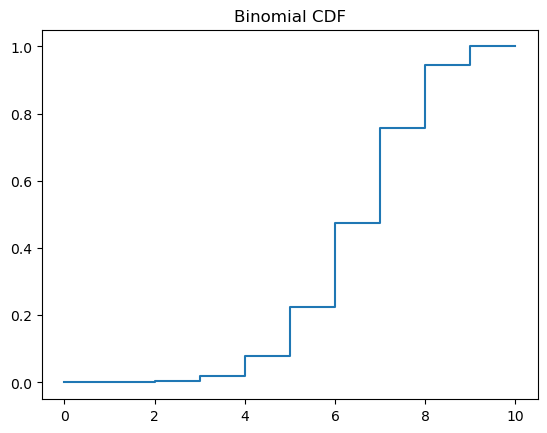

In [55]:
# Cumulative Distribution Function (CDF)
cdf = stats.binom.cdf(x, n, p)

plt.step(x, cdf)
plt.title("Binomial CDF")
plt.show()

In [66]:
stats.binom.cdf(3,10, .5)

0.171875

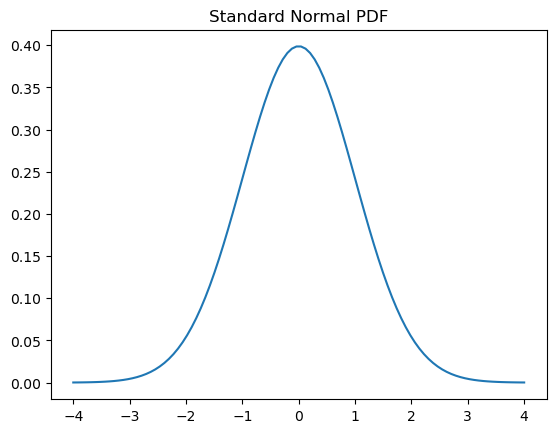

In [59]:
# Probability Density Function (PDF)
# continous random variables
x = np.linspace(-4, 4, 100)
pdf = stats.norm.pdf(x, 0, 1)

plt.plot(x, pdf)
plt.title("Standard Normal PDF")
plt.show()

In [67]:
stats.norm.pdf(5.1, 5.5, 0.5)

0.5793831055229652

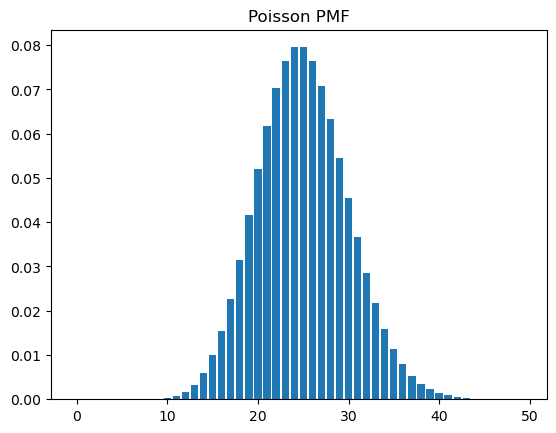

In [68]:
# Poisson Distribution
lambda_param = 25
x = np.arange(0, 50)
poisson_pmf = stats.poisson.pmf(x, lambda_param)

plt.bar(x, poisson_pmf)
plt.title("Poisson PMF")
plt.show()

In [70]:
population

array([0.44423403, 0.47434774, 0.49669998, ..., 0.02804506, 5.70867193,
       1.24839042])

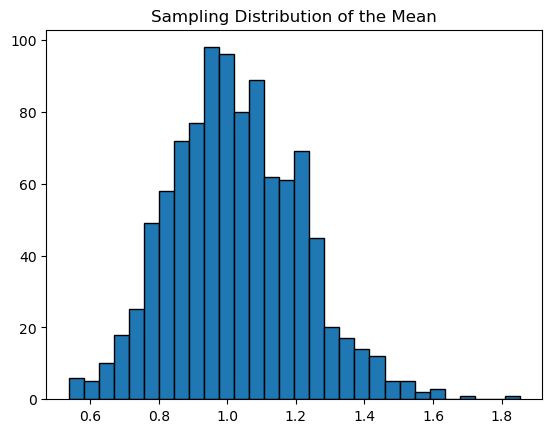

In [69]:
# Central Limit Theorem
def sample_means(population, sample_size, num_samples):
    return [np.mean(np.random.choice(population, sample_size)) for _ in range(num_samples)]

population = np.random.exponential(scale=1.0, size=10000)
sample_means_data = sample_means(population, 30, 1000)

plt.hist(sample_means_data, bins=30, edgecolor='black')
plt.title("Sampling Distribution of the Mean")
plt.show()

*Inspired from*: https://github.com/evanpeikon/math_for_compbio